In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
df = pd.read_excel("dado_painel_gdp_co2_final.xlsx")

In [312]:
df.columns

Index(['Unnamed: 0.1', 'Year', 'Unnamed: 0', 'country_code',
       'Agriculture_forestry_and_fishing_value_added_', 'CO2_emissions_',
       'Chemicals_', 'Electric_power_transmission_and_distribution_losses_',
       'Electricity_production_from_renewable_sources_excluding_hydroelectric_',
       'Firms_experiencing_electrical_outages_', 'GDP_', 'GDP_per_capita_',
       'GDP_per_capita_growth_', 'High-technology_exports_',
       'Human_capital_index_', 'Individuals_using_the_Internet_',
       'Patent_applications_nonresidents', 'Patent_applications_residents',
       'Population_density_', 'Population_growth_',
       'Renewable_energy_consumption_',
       'Research_and_development_expenditure_', 'Rural_population_growth_',
       'Unemployment_total_', 'Urban_population_', 'Urban_population_growth_',
       'Total_patent_applications', 'CO2_GDP', 'GDP_CO2', 'ln_GDP_CO2',
       'ln_CO2_GDP', 'ln_Total_patent_applications', 'population',
       'ln_population', 'patents_per_capit

<Axes: xlabel='Year'>

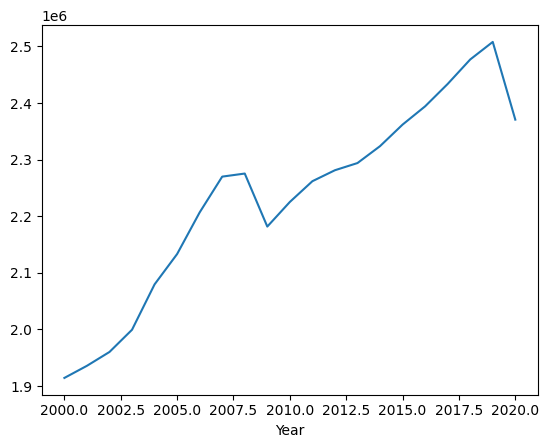

In [200]:
df.groupby("Year")['GDP_per_capita_'].sum().plot(x='Year', y=['GDP_per_capita_'])

<Axes: xlabel='Year'>

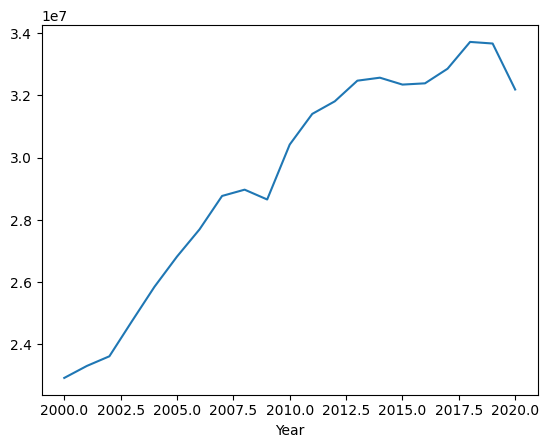

In [201]:
df.groupby("Year")['CO2_emissions_'].sum().plot(x='Year', y=['CO2_emissions_'])

Text(0.5, 1.0, 'CO2 emissions')

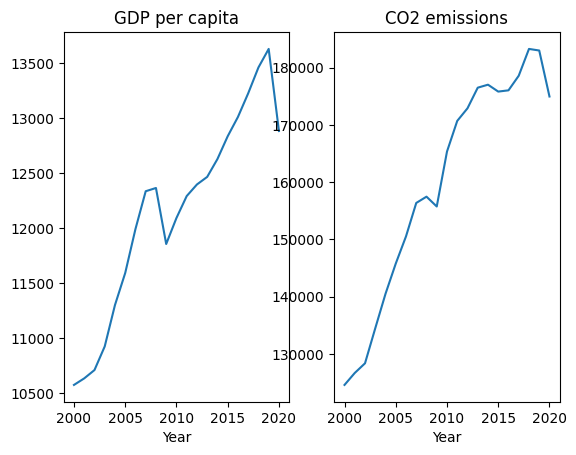

In [202]:
fig,ax = plt.subplots(1,2)
df.groupby('Year')['GDP_per_capita_'].mean().plot(ax=ax[0])
df.groupby('Year')['CO2_emissions_'].mean().plot(ax=ax[1])
ax[0].set_title("GDP per capita")
ax[1].set_title("CO2 emissions")

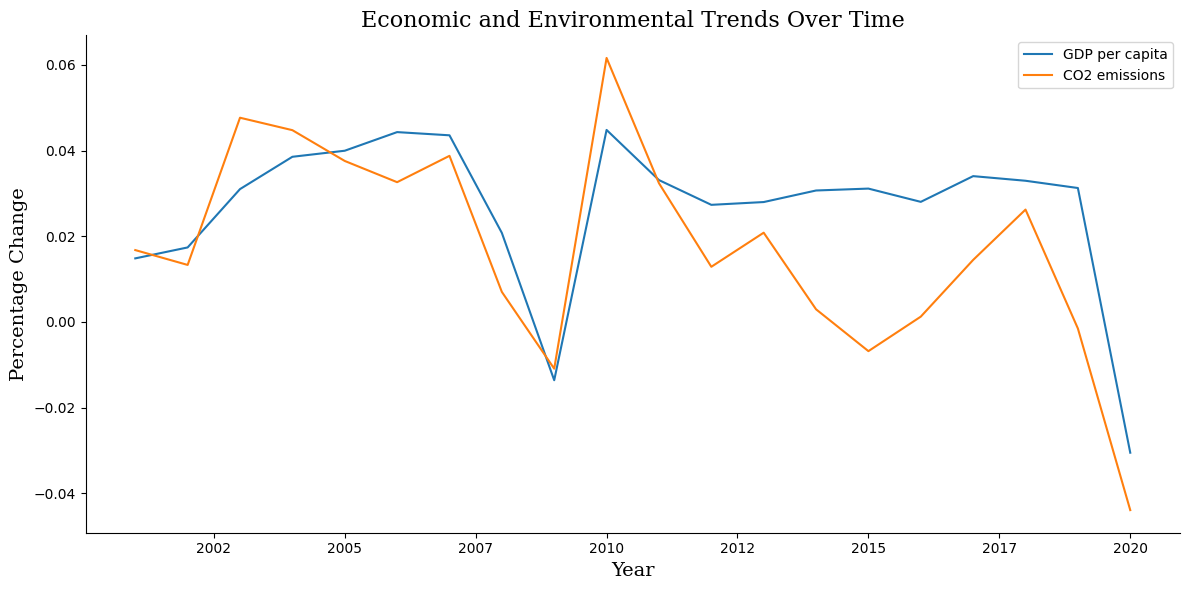

In [204]:
import matplotlib.pyplot as plt

# Primeiro gráfico: Variação percentual do PIB per capita e emissões de CO2
# First plot: Percentage change in GDP per capita and CO2 emissions over time
fig, ax = plt.subplots(figsize=(12, 6))
df.groupby('Year')['GDP_'].mean().pct_change().plot(ax=ax, label='GDP per capita')
df.groupby('Year')['CO2_emissions_'].mean().pct_change().plot(ax=ax, label='CO2 emissions')
ax.set_title("Economic and Environmental Trends Over Time", fontsize=16, fontfamily='serif')
ax.set_xlabel("Year", fontsize=14, fontfamily='serif')
ax.set_ylabel("Percentage Change", fontsize=14, fontfamily='serif')
ax.legend()

# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-ticks to be integers
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Adjust layout for better appearance
fig.tight_layout()

plt.show()



In [207]:
null_percentages = df['GDP_CO2'].isnull().groupby(df['country_code']).mean() * 100

threshold = 30
country_codes_to_drop = null_percentages[null_percentages > threshold].index

df = df[~df['country_code'].isin(country_codes_to_drop)]


df

,Unnamed: 0,country_code,Agriculture_forestry_and_fishing_value_added_,CO2_emissions_,Chemicals_,Electric_power_transmission_and_distribution_losses_,Electricity_production_from_renewable_sources_excluding_hydroelectric_,Firms_experiencing_electrical_outages_,GDP_,GDP_per_capita_,...,ln_co2_emissions_,country_name_x,country_name_y,continent_AF,continent_AS,continent_EU,continent_NA,continent_OC,continent_SA,continent
Year,,,,,,,,,,,,,,,,,,,,,
2000,0,AFG,NaN,1078.120,NaN,NaN,NaN,NaN,NaN,NaN,...,6.982974,Afghanistan,Afghanistan,False,True,False,False,False,False,AS
2001,1,AFG,NaN,1088.638,NaN,NaN,NaN,NaN,NaN,NaN,...,6.992683,Afghanistan,Afghanistan,False,True,False,False,False,False,AS
2002,2,AFG,NaN,1403.030,NaN,NaN,NaN,NaN,7.228796e+09,344.224183,...,7.246389,Afghanistan,Afghanistan,False,True,False,False,False,False,AS
2003,3,AFG,NaN,1653.207,NaN,NaN,NaN,NaN,7.867263e+09,347.415241,...,7.410472,Afghanistan,Afghanistan,False,True,False,False,False,False,AS
2004,4,AFG,NaN,1292.307,NaN,NaN,NaN,NaN,7.978516e+09,338.739398,...,7.164184,Afghanistan,Afghanistan,False,True,False,False,False,False,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,3859,ZWE,7.873986,10450.200,11.507948,NaN,NaN,76.5,2.014298e+10,1393.717010,...,9.254376,Zimbabwe,Zimbabwe,True,False,False,False,False,False,AF
2017,3860,ZWE,8.340969,9781.000,9.137246,NaN,NaN,NaN,2.096487e+10,1421.240769,...,9.188197,Zimbabwe,Zimbabwe,True,False,False,False,False,False,AF
2018,3861,ZWE,7.319375,11069.900,6.498292,NaN,NaN,NaN,2.201518e+10,1462.590279,...,9.311985,Zimbabwe,Zimbabwe,True,False,False,False,False,False,AF


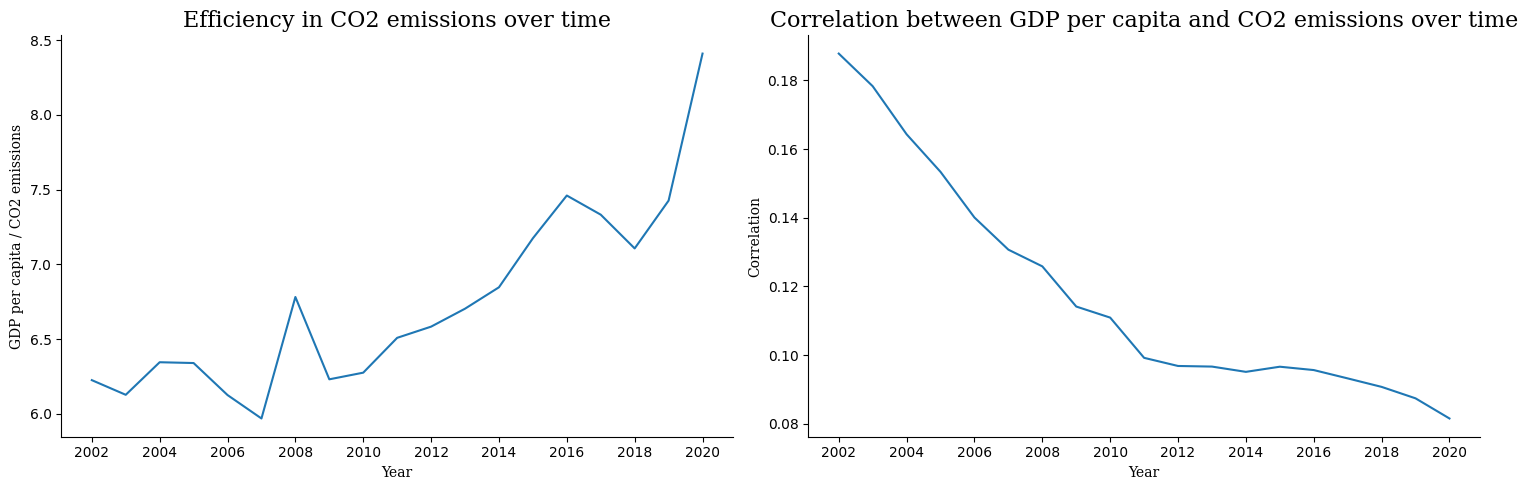

In [289]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# First plot: Efficiency in CO2 emissions over time
sns.lineplot(ax=axes[0], x='Year', y='GDP_CO2', data=df.query("Year >= 2002").groupby('Year')['GDP_CO2'].mean().reset_index())
axes[0].set_title('Efficiency in CO2 emissions over time', fontfamily='serif', fontsize=16)
axes[0].set_xlabel('Year', fontfamily='serif')
axes[0].set_ylabel('GDP per capita / CO2 emissions', fontfamily='serif')
axes[0].set_xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
sns.despine(ax=axes[0])

# Calculating correlations for the second plot
years = df['Year'].unique()
correlations = []

for year in years:
    gdp_per_capita = df.groupby(['country_code', 'Year'])['GDP_per_capita_'].mean().reset_index().query(f"Year == {year}")['GDP_per_capita_']
    co2_per_capita = df.groupby(['country_code', 'Year'])['CO2_emissions_'].mean().reset_index().query(f"Year == {year}")['CO2_emissions_']
    combined = pd.concat([gdp_per_capita, co2_per_capita], axis=1).dropna()

    if not combined.empty:
        correlation = combined.corr().values[0][1]
        correlations.append((year, correlation))

# Converting to DataFrame
correlation_df = pd.DataFrame(correlations, columns=['Year', 'Correlation'])

# Second plot: Correlation between GDP per capita and CO2 emissions over years
axes[1].plot(correlation_df['Year'], correlation_df['Correlation'])
axes[1].set_title('Correlation between GDP per capita and CO2 emissions over time', fontsize=16, fontfamily='serif')
axes[1].set_xlabel('Year', fontfamily='serif')
axes[1].set_ylabel('Correlation', fontfamily='serif')
axes[1].set_xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

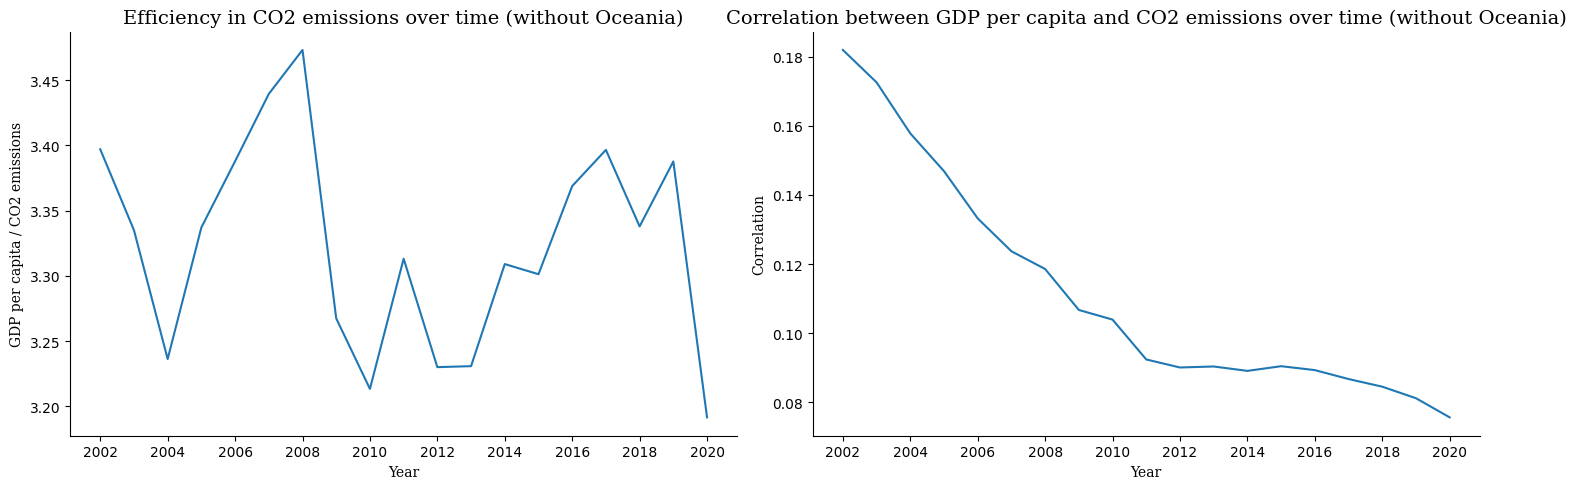

In [292]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# First plot: Efficiency in CO2 emissions over time
sns.lineplot(ax=axes[0], x='Year', y='GDP_CO2', data=df.query("Year >= 2002 and continent != 'OC'").groupby('Year')['GDP_CO2'].mean().reset_index())
axes[0].set_title('Efficiency in CO2 emissions over time (without Oceania)', fontfamily='serif', fontsize=14)
axes[0].set_xlabel('Year', fontfamily='serif')
axes[0].set_ylabel('GDP per capita / CO2 emissions', fontfamily='serif')
axes[0].set_xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
sns.despine(ax=axes[0])

# Calculating correlations for the second plot
years = df['Year'].unique()
correlations = []

for year in years:
    gdp_per_capita = df.query("Year >= 2002 and continent != 'OC'").groupby(['country_code', 'Year'])['GDP_per_capita_'].mean().reset_index().query(f"Year == {year}")['GDP_per_capita_']
    co2_per_capita = df.query("Year >= 2002 and continent != 'OC'").groupby(['country_code', 'Year'])['CO2_emissions_'].mean().reset_index().query(f"Year == {year}")['CO2_emissions_']
    combined = pd.concat([gdp_per_capita, co2_per_capita], axis=1).dropna()

    if not combined.empty:
        correlation = combined.corr().values[0][1]
        correlations.append((year, correlation))

# Converting to DataFrame
correlation_df = pd.DataFrame(correlations, columns=['Year', 'Correlation'])

# Second plot: Correlation between GDP per capita and CO2 emissions over years
axes[1].plot(correlation_df['Year'], correlation_df['Correlation'])
axes[1].set_title('Correlation between GDP per capita and CO2 emissions over time (without Oceania)', fontsize=14, fontfamily='serif')
axes[1].set_xlabel('Year', fontfamily='serif')
axes[1].set_ylabel('Correlation', fontfamily='serif')
axes[1].set_xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [209]:
# Calcular correlações para cada país
correlations_by_country = []

for country in df['continent'].unique():
    gdp_per_capita = df[df['continent'] == country].groupby('Year')['GDP_per_capita_'].mean()
    co2_per_capita = df[df['continent'] == country].groupby('Year')['CO2_emissions_'].mean()
    combined = pd.concat([gdp_per_capita, co2_per_capita], axis=1).dropna()

    if not combined.empty:
        correlation = combined.corr().values[0][1]
        correlations_by_country.append((country, correlation))

# Convertendo para DataFrame
correlation_country_df = pd.DataFrame(correlations_by_country, columns=['continent', 'Correlation'])

# Ordenar e selecionar as 10 maiores e 10 menores correlações
top_10_correlations = correlation_country_df.nlargest(10, 'Correlation')
bottom_10_correlations = correlation_country_df.nsmallest(10, 'Correlation')

print("Top 10 country codes with highest correlations:")
print(top_10_correlations)

print("\nTop 10 country codes with lowest correlations:")
print(bottom_10_correlations)


Top 10 country codes with highest correlations:
  continent  Correlation
3        SA     0.981998
0        AS     0.965217
1        AF     0.922005
5        OC     0.751467
4        NA    -0.560442
2        EU    -0.710881

Top 10 country codes with lowest correlations:
  continent  Correlation
2        EU    -0.710881
4        NA    -0.560442
5        OC     0.751467
1        AF     0.922005
0        AS     0.965217
3        SA     0.981998


In [210]:
# Calcular correlações para cada país
correlations_by_country = []

for country in df['country_code'].unique():
    gdp_per_capita = df[df['country_code'] == country].groupby('Year')['ln_gdp_per_capita'].mean()
    co2_per_capita = df[df['country_code'] == country].groupby('Year')['ln_co2_emissions_'].mean()
    combined = pd.concat([gdp_per_capita, co2_per_capita], axis=1).dropna()

    if not combined.empty:
        correlation = combined.corr().values[0][1]
        correlations_by_country.append((country, correlation))

# Convertendo para DataFrame
correlation_country_df = pd.DataFrame(correlations_by_country, columns=['country_code', 'Correlation'])

# Ordenar e selecionar as 10 maiores e 10 menores correlações
top_10_correlations = correlation_country_df.nlargest(5, 'Correlation')
bottom_10_correlations = correlation_country_df.nsmallest(5, 'Correlation')

print("Top 5 country codes with highest correlations:")
print(top_10_correlations)

print("\nTop 5 country codes with lowest correlations:")
print(bottom_10_correlations)


Top 5 country codes with highest correlations:
    country_code  Correlation
177          VNM     0.995088
171          UGA     0.990413
103          MAR     0.988450
75           IND     0.987720
15           BGD     0.987616

Top 5 country codes with lowest correlations:
    country_code  Correlation
155          SWE    -0.892307
4            ARE    -0.848074
12           BEL    -0.847101
153          SVK    -0.841748
111          MLT    -0.800569


In [211]:
df.query("country_code == 'ARE'")['GDP_CO2']

Year
2000    0.722149
2001    0.605274
2002    0.577792
2003    0.572035
2004    0.564861
2005    0.521906
2006    0.479886
2007    0.380893
2008    0.279034
2009    0.229756
2010    0.212181
2011    0.217775
2012    0.208138
2013    0.205637
2014    0.210256
2015    0.212502
2016    0.216854
2017    0.226219
2018    0.250510
2019    0.235853
2020    0.219449
Name: GDP_CO2, dtype: float64

In [213]:
df = df.query("Year >= 2002")

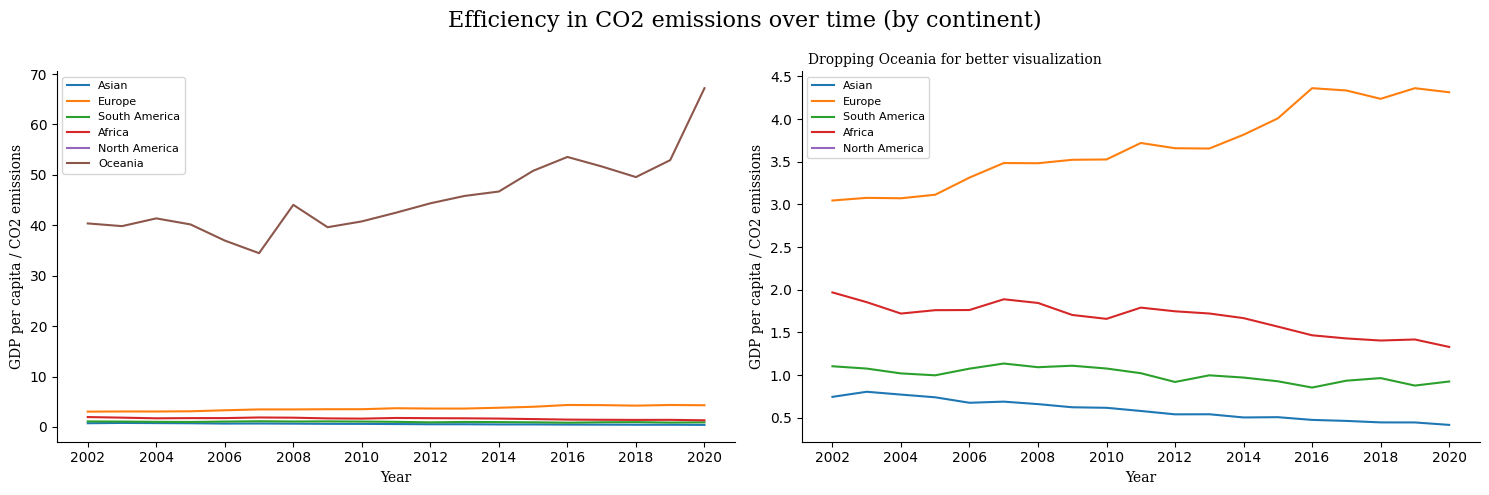

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Plotting both graphs in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True)

# First graph with Oceania
sns.lineplot(ax=axes[0], x='Year', y='GDP_CO2', data=df.query("continent == 'AS'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='Asian')
sns.lineplot(ax=axes[0], x='Year', y='GDP_CO2', data=df.query("continent == 'EU'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='Europe')
sns.lineplot(ax=axes[0], x='Year', y='GDP_CO2', data=df.query("continent == 'SA'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='South America')
sns.lineplot(ax=axes[0], x='Year', y='GDP_CO2', data=df.query("continent == 'AF'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='Africa')
sns.lineplot(ax=axes[0], x='Year', y='GDP_CO2', data=df.query("continent == 'NA'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='North America')
sns.lineplot(ax=axes[0], x='Year', y='GDP_CO2', data=df.query("continent == 'OC'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='Oceania')
plt.suptitle('Efficiency in CO2 emissions over time (by continent)', fontfamily='serif', fontsize=16)
axes[0].set_xlabel('Year', fontfamily='serif')
axes[0].set_xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
axes[0].set_ylabel('GDP per capita / CO2 emissions', fontfamily='serif')
axes[0].legend(prop={'size': 8})
sns.despine(ax=axes[0])

# Second graph without Oceania
sns.lineplot(ax=axes[1], x='Year', y='GDP_CO2', data=df.query("continent == 'AS'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='Asian')
sns.lineplot(ax=axes[1], x='Year', y='GDP_CO2', data=df.query("continent == 'EU'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='Europe')
sns.lineplot(ax=axes[1], x='Year', y='GDP_CO2', data=df.query("continent == 'SA'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='South America')
sns.lineplot(ax=axes[1], x='Year', y='GDP_CO2', data=df.query("continent == 'AF'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='Africa')
sns.lineplot(ax=axes[1], x='Year', y='GDP_CO2', data=df.query("continent == 'NA'").groupby('Year')['GDP_CO2'].mean().reset_index(), label='North America')
axes[1].annotate('Dropping Oceania for better visualization', xy=(0.01, 1.05), xycoords='axes fraction', ha='left', va='top', fontsize=10, fontfamily='serif')
axes[1].set_xlabel('Year', fontfamily='serif')
axes[1].set_xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
axes[1].set_ylabel('GDP per capita / CO2 emissions', fontfamily='serif')
axes[1].legend(prop={'size': 8})
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()


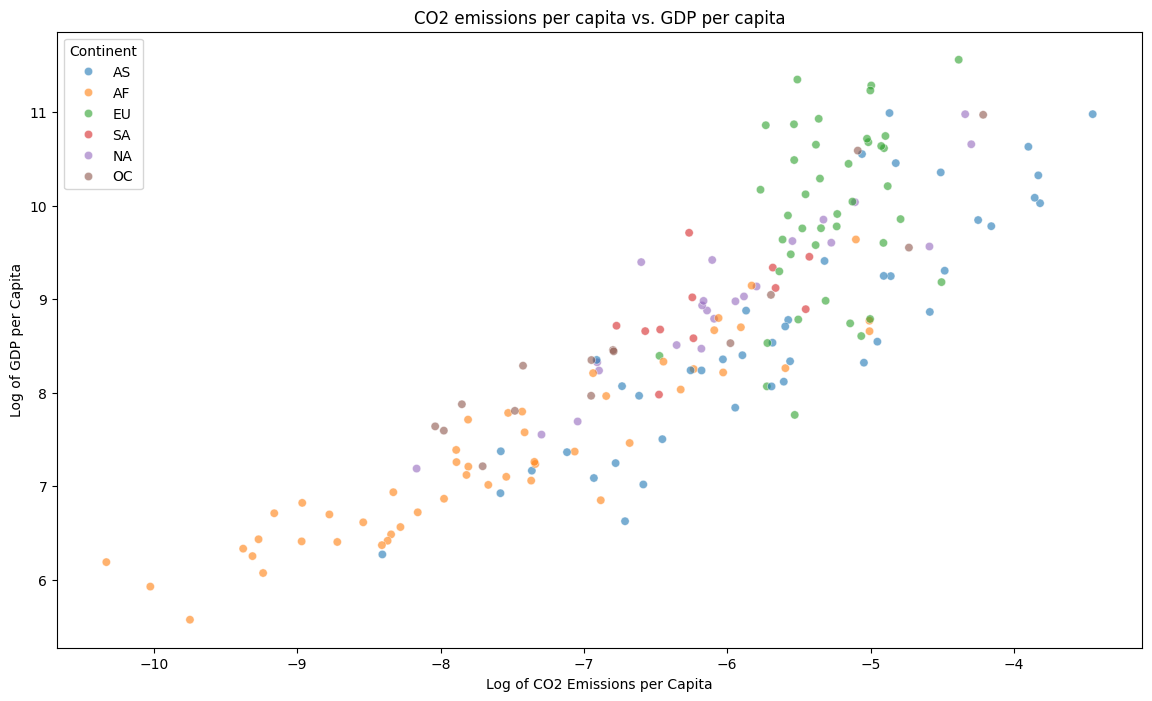

In [217]:
grouped_df = df.reset_index('Year').query("Year == 2020").groupby(['country_code', 'continent','population'])[['ln_co2_emissions_per_capita', 'ln_gdp_per_capita']].mean().reset_index()

# Criar um scatterplot com ajuste de alpha
plt.figure(figsize=(14, 8))
sns.scatterplot(x='ln_co2_emissions_per_capita', y='ln_gdp_per_capita', data=grouped_df, hue='continent', alpha=0.6)

# Adicionar títulos e rótulos
plt.title('CO2 emissions per capita vs. GDP per capita')
plt.xlabel('Log of CO2 Emissions per Capita')
plt.ylabel('Log of GDP per Capita')

# Ajustar a legenda
plt.legend(loc='upper left', title='Continent')

# Mostrar o gráfico
plt.show()

In [296]:
df.dropna(subset=['GDP_CO2']).groupby('continent')['GDP_CO2'].mean().sort_values()

continent
AS     0.591835
SA     1.004376
AF     1.668986
EU     3.690005
NA    12.604266
OC    45.449998
Name: GDP_CO2, dtype: float64

In [301]:
df.dropna(subset=['GDP_CO2']).groupby('country_code')['GDP_CO2'].mean().sort_values()

country_code
CHN      0.000730
IND      0.000773
RUS      0.005324
IDN      0.006484
PAK      0.009106
          ...    
PLW     65.128621
AND     77.821701
KNA     78.776857
NRU    127.419949
TUV    333.056089
Name: GDP_CO2, Length: 184, dtype: float64

In [300]:
df.groupby('Year')['GDP_CO2'].mean()

Year
2002    6.225685
2003    6.127638
2004    6.345477
2005    6.340110
2006    6.126000
2007    5.969317
2008    6.781799
2009    6.231214
2010    6.275726
2011    6.508680
2012    6.583541
2013    6.703555
2014    6.846723
2015    7.174545
2016    7.460396
2017    7.332351
2018    7.106639
2019    7.426436
2020    8.409744
Name: GDP_CO2, dtype: float64

In [223]:
# Estatísticas descritivas
stats = df_eficiencia_co2.describe()
print(stats)

count     6.000000
mean     10.834911
std      17.538294
min       0.591835
25%       1.170528
50%       2.679496
75%      10.375701
max      45.449998
Name: GDP_CO2, dtype: float64


In [313]:
df['patents_1000_capita'] = df['patents_per_capita'] * 1000

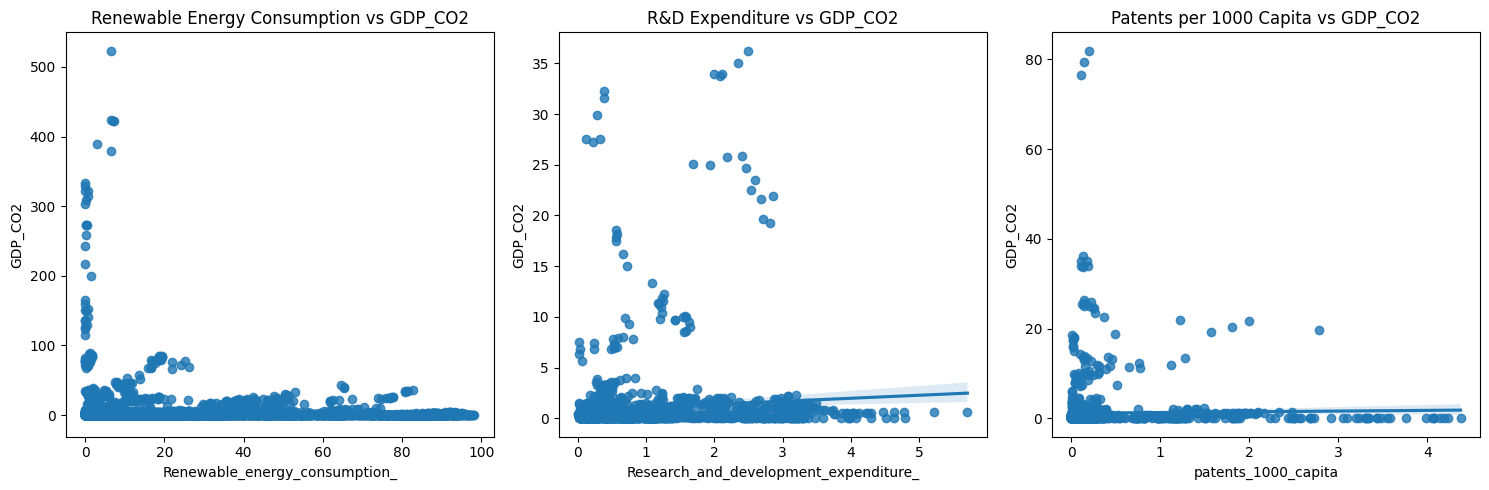

In [316]:
plt.figure(figsize=(15, 5))

# Renewable energy consumption vs GDP_CO2
plt.subplot(1, 3, 1)
sns.regplot(x='Renewable_energy_consumption_', y='GDP_CO2', data=df)
plt.title('Renewable Energy Consumption vs GDP_CO2')

# Research and development expenditure vs GDP_CO2
plt.subplot(1, 3, 2)
sns.regplot(x='Research_and_development_expenditure_', y='GDP_CO2', data=df)
plt.title('R&D Expenditure vs GDP_CO2')

# Patents per 1000 capita vs GDP_CO2
plt.subplot(1, 3, 3)
sns.regplot(x='patents_1000_capita', y='GDP_CO2', data=df)
plt.title('Patents per 1000 Capita vs GDP_CO2')

# Show plots
plt.tight_layout()
plt.show()